In [1]:
import pandas as pd
chessdata=pd.read_csv("chess-games-reduced.csv")
print(chessdata)

       rated  turns increment_code  white_rating  black_rating first_move  \
0      False     13           15+2          1500          1191         d4   
1       True     16           5+10          1322          1261         d4   
2       True     61           5+10          1496          1500         e4   
3       True     61           20+0          1439          1454         d4   
4       True     95           30+3          1523          1469         e4   
...      ...    ...            ...           ...           ...        ...   
20053   True     24          10+10          1691          1220         d4   
20054   True     82           10+0          1233          1196         d4   
20055   True     35           10+0          1219          1286         d4   
20056   True    109           10+0          1360          1227         e4   
20057   True     78           10+0          1235          1339         d4   

      second_move  opening_ply  
0              d5            5  
1        

In [2]:
print(chessdata.keys())

Index(['rated', 'turns', 'increment_code', 'white_rating', 'black_rating',
       'first_move', 'second_move', 'opening_ply'],
      dtype='object')


In [3]:
import array as arr
Greater_rating=[]
Greater_rating = [0 for i in range(20058)] 
for i in range (20058):
 if chessdata.white_rating[i]>chessdata.black_rating[i]:
   Greater_rating[i]=chessdata.white_rating[i]
for i in range (20058):
 if chessdata.black_rating[i]>chessdata.white_rating[i]:
   Greater_rating[i]=chessdata.black_rating[i]
for i in range (20058):
 if chessdata.black_rating[i]==chessdata.white_rating[i]:
   Greater_rating[i]=chessdata.white_rating[i]
print(Greater_rating)


[1500, 1322, 1500, 1454, 1523, 1250, 1520, 2108, 1439, 1381, 1381, 1867, 1936, 1607, 1141, 1141, 1141, 1141, 1300, 1500, 1676, 1094, 1500, 1307, 1423, 1219, 1825, 1328, 1156, 1148, 1358, 1200, 1203, 1500, 1422, 1832, 1569, 1500, 1500, 2449, 1207, 1241, 1500, 2443, 1500, 1500, 1500, 1343, 2436, 2436, 1500, 1500, 1500, 1500, 1521, 1500, 1492, 1442, 1457, 1525, 1579, 1573, 1605, 1939, 1618, 1755, 1596, 1554, 1544, 1563, 1579, 1617, 1588, 1595, 1855, 1589, 1728, 1720, 2105, 1768, 1552, 1667, 1549, 1545, 1537, 1522, 1602, 1593, 1556, 1548, 1539, 1603, 1542, 1877, 1535, 1784, 1501, 1500, 1745, 1748, 1942, 1855, 1951, 1726, 1806, 1728, 1743, 1750, 1746, 1744, 1749, 1769, 1795, 1795, 1795, 1872, 1783, 1884, 1756, 1958, 2036, 1706, 1244, 1215, 1350, 1280, 1212, 1341, 1359, 1275, 1433, 1276, 1308, 1266, 1409, 1338, 1336, 1316, 1253, 1335, 1223, 1443, 1227, 1219, 1227, 1550, 1325, 1221, 1478, 1626, 1228, 1422, 1223, 1212, 1343, 1865, 1852, 1863, 1918, 1861, 1853, 1910, 1890, 1860, 1848, 1858, 189

In [4]:
print(chessdata.first_move)

0        d4
1        d4
2        e4
3        d4
4        e4
         ..
20053    d4
20054    d4
20055    d4
20056    e4
20057    d4
Name: first_move, Length: 20058, dtype: object


In [ ]:
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0,right=1,top=1,bottom=0,hspace=0.05,wspace=0.05)
for i in range(64):
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(chessdata.first_move[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,)

In [5]:
#encode rated column to integer

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
col_0 = chessdata.rated
set_col_0 = list(set(col_0))
le.fit(col_0)
dict(zip(set_col_0, le.transform(set_col_0)))

chessdata.rated = le.transform(chessdata.rated)

print(chessdata.rated)

0        0
1        1
2        1
3        1
4        1
        ..
20053    1
20054    1
20055    1
20056    1
20057    1
Name: rated, Length: 20058, dtype: int64


In [6]:
#encode column 2 to integer

col_2 = chessdata.increment_code
set_col_2 = list(set(col_2))
le.fit(col_2)
dict(zip(set_col_2, le.transform(set_col_2)))

chessdata.increment_code = le.transform(chessdata.increment_code)

print(chessdata.increment_code)

0        110
1        298
2        298
3        187
4        247
        ... 
20053     21
20054     19
20055     19
20056     19
20057     19
Name: increment_code, Length: 20058, dtype: int64


In [7]:
#encode column 5 to integer

col_5 = chessdata.first_move
set_col_5 = list(set(col_5))
le.fit(col_5)
dict(zip(set_col_5, le.transform(set_col_5)))

chessdata.first_move = le.transform(chessdata.first_move)

print(chessdata.first_move)

0        11
1        11
2        13
3        11
4        13
         ..
20053    11
20054    11
20055    11
20056    13
20057    11
Name: first_move, Length: 20058, dtype: int64


In [8]:
for i in range(0, 20058):
    if type(chessdata.second_move[i]) is not str:
        chessdata.second_move[i] = 'NONE'
    if type(chessdata.second_move[i]) is not str:
        print(i, chessdata.second_move[i], chessdata.id[i])


<ipython-input-8-4d667fdd3dbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chessdata.second_move[i] = 'NONE'


In [9]:
#encode column 6 to integer

col_6 = chessdata.second_move
set_col_6 = list(set(col_6))
le.fit(col_6)
dict(zip(set_col_6, le.transform(set_col_6)))

chessdata.second_move = le.transform(chessdata.second_move)

print(chessdata.second_move)

0        15
1         4
2        17
3        15
4        17
         ..
20053    19
20054    16
20055    15
20056    16
20057    15
Name: second_move, Length: 20058, dtype: int64


In [10]:
chesswinner=pd.read_csv("chess-games-winner.csv")
print(chesswinner)

      winner
0      white
1      black
2      white
3      white
4      white
...      ...
20053  white
20054  black
20055  white
20056  white
20057  black

[20058 rows x 1 columns]


In [11]:
#encode column 0 to integer

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
col_0 = chesswinner.winner
set_col_0 = list(set(col_0))
le.fit(col_0)
dict(zip(set_col_0, le.transform(set_col_0)))

chesswinner.winner = le.transform(chesswinner.winner)

print(chesswinner.winner)

0        2
1        0
2        2
3        2
4        2
        ..
20053    2
20054    0
20055    2
20056    2
20057    0
Name: winner, Length: 20058, dtype: int64


In [12]:
#convert 2-D array to 1-D
chessresult = []

for i in range(0, 20058):
    chessresult.append(chesswinner.winner[i])
    
print(chessresult)

[2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 

In [13]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(chessdata, chessresult, test_size=0.3) # 70% training and 30% test

n_samples, n_features = X_train.shape

#print training set shape
print(X_train.shape)

#print training set shape
print(X_test.shape)

(14040, 8)
(6018, 8)


In [14]:
print(y_train)

[2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 2, 

In [15]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

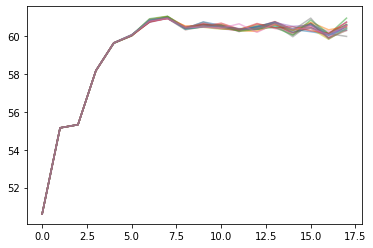

In [47]:
#Use a DecisionTreeClassifier machine algorithm with looping max_depth parameter

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

results = []
random_state = []
max_depth = []

for i in range(2, 20):
    for j in range(2, 20):
        DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=j,max_depth=i)
        DecisionTree.fit(X_train, y_train)
        predicted_values = DecisionTree.predict(X_test)
        x = metrics.accuracy_score(y_test, predicted_values)
        max_depth.append(x*100)
    results.append(max_depth)
    max_depth = []

import matplotlib.pyplot as plt

plt.plot(results, alpha=0.5)


In [16]:
#Use a DecisionTreeClassifier machine algorithm

# https://medium.com/swlh/decision-tree-classification-de64fc4d5aac

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train, y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test, predicted_values))

DecisionTrees's Accuracy is:  58.1588567630442
              precision    recall  f1-score   support

           0       0.57      0.48      0.52      2731
           1       0.00      0.00      0.00       281
           2       0.59      0.73      0.65      3006

    accuracy                           0.58      6018
   macro avg       0.39      0.40      0.39      6018
weighted avg       0.55      0.58      0.56      6018



In [17]:
#Use a GaussianNB machine learning algorithm

# https://iq.opengenus.org/gaussian-naive-bayes/

from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.597374543037554
              precision    recall  f1-score   support

           0       0.64      0.44      0.52      2731
           1       0.20      0.15      0.17       281
           2       0.60      0.78      0.68      3006

    accuracy                           0.60      6018
   macro avg       0.48      0.46      0.46      6018
weighted avg       0.60      0.60      0.58      6018



In [18]:
#Use a Support Vector Machine machine algorithm

# https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(X_train, y_train)

predicted_values = SVM.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test, predicted_values))

SVM's Accuracy is:  0.5327351279494849
              precision    recall  f1-score   support

           0       0.94      0.07      0.13      2731
           1       1.00      0.08      0.15       281
           2       0.52      1.00      0.68      3006

    accuracy                           0.53      6018
   macro avg       0.82      0.38      0.32      6018
weighted avg       0.73      0.53      0.41      6018



In [32]:
#Use a Logistic Regression machine learning algorithm

# https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-logistic-regression/

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train, y_train)

predicted_values = LogReg.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test, predicted_values))

Logistic Regression's Accuracy is:  0.6173147224991692
              precision    recall  f1-score   support

           0       0.62      0.55      0.59      2731
           1       0.09      0.00      0.01       281
           2       0.62      0.73      0.67      3006

    accuracy                           0.62      6018
   macro avg       0.44      0.43      0.42      6018
weighted avg       0.59      0.62      0.60      6018



[0.5358923230309073, 0.6003655699567962, 0.581588567630442, 0.6046859421734796, 0.6111665004985045, 0.6224659355267531, 0.6242937853107344, 0.6370887337986042, 0.6314390162844798, 0.6277833167165171, 0.6339315387171818, 0.6249584579594549, 0.6311066799601196, 0.632934529744101, 0.634097706879362, 0.6264539714190761, 0.6357593885011632, 0.6390827517447657]


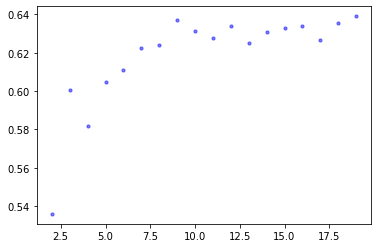

In [31]:
#Use a RandomForestClassifier machine algorithm with looping n_estimators parameter

from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')

results = []
random_state = []

for i in range(2, 20):
    random_state.append(i)
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=i, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
    clf.fit(X_train, y_train)
    predicted_values = clf.predict(X_test)
    x = metrics.accuracy_score(y_test, predicted_values)
    results.append(x)

import matplotlib.pyplot as plt 

plt.scatter(random_state, results, s=10, c='b', alpha=0.5)
print(results)

In [33]:
#useful tutorial at: https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [34]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(min_impurity_split=1e-07, n_estimators=10, n_jobs=1)

In [35]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# make predictions
y_predict = clf.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Random Forest')
print("Random Forest's Accuracy is: ", x)

print(classification_report(y_test, predicted_values))

Random Forest's Accuracy is:  0.6173147224991692
              precision    recall  f1-score   support

           0       0.62      0.55      0.59      2731
           1       0.09      0.00      0.01       281
           2       0.62      0.73      0.67      3006

    accuracy                           0.62      6018
   macro avg       0.44      0.43      0.42      6018
weighted avg       0.59      0.62      0.60      6018



In [38]:
# show the inputs and predicted outputs
i=0

for winner in y_test:
    print("n=%s, Predicted=%s, Actual=%s" % (i, y_predict[i], winner))
    i=i+1

n=0, Predicted=2, Actual=2
n=1, Predicted=2, Actual=0
n=2, Predicted=2, Actual=2
n=3, Predicted=0, Actual=2
n=4, Predicted=0, Actual=2
n=5, Predicted=2, Actual=2
n=6, Predicted=0, Actual=0
n=7, Predicted=2, Actual=2
n=8, Predicted=2, Actual=1
n=9, Predicted=0, Actual=2
n=10, Predicted=0, Actual=0
n=11, Predicted=2, Actual=1
n=12, Predicted=2, Actual=0
n=13, Predicted=0, Actual=0
n=14, Predicted=2, Actual=2
n=15, Predicted=0, Actual=0
n=16, Predicted=0, Actual=0
n=17, Predicted=2, Actual=2
n=18, Predicted=0, Actual=0
n=19, Predicted=2, Actual=2
n=20, Predicted=2, Actual=1
n=21, Predicted=2, Actual=2
n=22, Predicted=0, Actual=1
n=23, Predicted=0, Actual=0
n=24, Predicted=2, Actual=0
n=25, Predicted=0, Actual=0
n=26, Predicted=2, Actual=2
n=27, Predicted=2, Actual=2
n=28, Predicted=2, Actual=0
n=29, Predicted=2, Actual=2
n=30, Predicted=0, Actual=0
n=31, Predicted=0, Actual=2
n=32, Predicted=2, Actual=0
n=33, Predicted=2, Actual=2
n=34, Predicted=2, Actual=2
n=35, Predicted=0, Actual=0
n=

n=1677, Predicted=0, Actual=2
n=1678, Predicted=0, Actual=0
n=1679, Predicted=0, Actual=0
n=1680, Predicted=1, Actual=2
n=1681, Predicted=0, Actual=0
n=1682, Predicted=2, Actual=2
n=1683, Predicted=0, Actual=1
n=1684, Predicted=0, Actual=1
n=1685, Predicted=2, Actual=2
n=1686, Predicted=0, Actual=0
n=1687, Predicted=2, Actual=2
n=1688, Predicted=2, Actual=0
n=1689, Predicted=2, Actual=2
n=1690, Predicted=2, Actual=2
n=1691, Predicted=2, Actual=2
n=1692, Predicted=0, Actual=0
n=1693, Predicted=0, Actual=2
n=1694, Predicted=0, Actual=2
n=1695, Predicted=2, Actual=2
n=1696, Predicted=0, Actual=0
n=1697, Predicted=0, Actual=0
n=1698, Predicted=2, Actual=0
n=1699, Predicted=0, Actual=2
n=1700, Predicted=2, Actual=2
n=1701, Predicted=0, Actual=0
n=1702, Predicted=2, Actual=2
n=1703, Predicted=0, Actual=0
n=1704, Predicted=0, Actual=0
n=1705, Predicted=0, Actual=0
n=1706, Predicted=0, Actual=0
n=1707, Predicted=0, Actual=0
n=1708, Predicted=0, Actual=2
n=1709, Predicted=0, Actual=0
n=1710, Pr

n=3177, Predicted=0, Actual=0
n=3178, Predicted=0, Actual=0
n=3179, Predicted=2, Actual=2
n=3180, Predicted=0, Actual=0
n=3181, Predicted=2, Actual=0
n=3182, Predicted=2, Actual=2
n=3183, Predicted=0, Actual=0
n=3184, Predicted=2, Actual=2
n=3185, Predicted=2, Actual=2
n=3186, Predicted=0, Actual=0
n=3187, Predicted=2, Actual=2
n=3188, Predicted=2, Actual=2
n=3189, Predicted=0, Actual=0
n=3190, Predicted=2, Actual=2
n=3191, Predicted=0, Actual=0
n=3192, Predicted=0, Actual=0
n=3193, Predicted=2, Actual=2
n=3194, Predicted=2, Actual=2
n=3195, Predicted=2, Actual=2
n=3196, Predicted=2, Actual=0
n=3197, Predicted=2, Actual=2
n=3198, Predicted=0, Actual=2
n=3199, Predicted=2, Actual=2
n=3200, Predicted=0, Actual=1
n=3201, Predicted=0, Actual=0
n=3202, Predicted=0, Actual=2
n=3203, Predicted=2, Actual=2
n=3204, Predicted=2, Actual=2
n=3205, Predicted=0, Actual=2
n=3206, Predicted=0, Actual=0
n=3207, Predicted=2, Actual=0
n=3208, Predicted=2, Actual=0
n=3209, Predicted=2, Actual=2
n=3210, Pr

n=4676, Predicted=0, Actual=2
n=4677, Predicted=2, Actual=0
n=4678, Predicted=0, Actual=2
n=4679, Predicted=0, Actual=0
n=4680, Predicted=2, Actual=0
n=4681, Predicted=2, Actual=2
n=4682, Predicted=0, Actual=2
n=4683, Predicted=2, Actual=2
n=4684, Predicted=0, Actual=2
n=4685, Predicted=0, Actual=0
n=4686, Predicted=0, Actual=0
n=4687, Predicted=2, Actual=0
n=4688, Predicted=0, Actual=2
n=4689, Predicted=0, Actual=0
n=4690, Predicted=2, Actual=2
n=4691, Predicted=0, Actual=0
n=4692, Predicted=0, Actual=2
n=4693, Predicted=2, Actual=2
n=4694, Predicted=2, Actual=1
n=4695, Predicted=2, Actual=2
n=4696, Predicted=2, Actual=2
n=4697, Predicted=2, Actual=2
n=4698, Predicted=2, Actual=2
n=4699, Predicted=2, Actual=0
n=4700, Predicted=0, Actual=2
n=4701, Predicted=2, Actual=2
n=4702, Predicted=2, Actual=0
n=4703, Predicted=2, Actual=2
n=4704, Predicted=0, Actual=2
n=4705, Predicted=2, Actual=2
n=4706, Predicted=2, Actual=0
n=4707, Predicted=0, Actual=0
n=4708, Predicted=0, Actual=0
n=4709, Pr

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

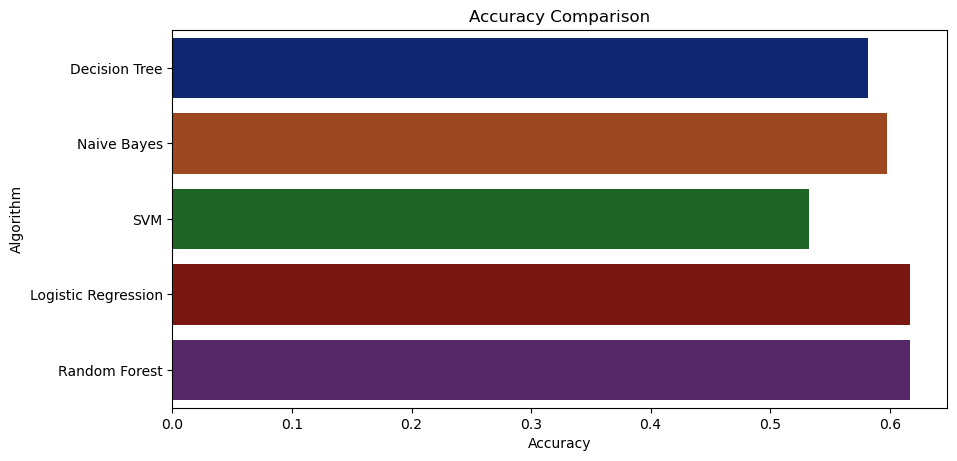

In [37]:
#show an accuracy comparison

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [49]:
#Make a prediction on new cases

import numpy as np

data = np.array([[0, 45, 0, 1500, 1500, 5, 0, 4]])
prediction = clf.predict(data)
print(prediction)

[2]


In [50]:
data = np.array([[0, 45, 0, 1800, 1500, 0, 0, 4]])
prediction = SVM.predict(data)
print(prediction)

[2]
